In [3]:
import numpy as np        # For numerical operations and working with arrays
import pandas as pd       # For data manipulation and handling structured data (like tables)
import matplotlib.pyplot as plt  # For basic data visualization (plots, charts, graphs)
import seaborn as sns     # For advanced and visually appealing statistical plots (built on top of matplotlib)


In [4]:
df = pd.read_csv("Expanded_data_with_more_features.csv")  # Loads the CSV file into a DataFrame 


In [5]:
print(df.head())  # Displays the first 5 rows of the DataFrame to get a quick overview of the data

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  AvgMathScore  \
0            < 5         71            71  

In [6]:
df.describe()  # Returns summary statistics (count, mean, std, min, max, etc.) for numerical columns

NrSiblings     MathScore  ReadingScore  WritingScore  AvgMathScore  \
count  29069.000000  30641.000000  30641.000000  30641.000000  30641.000000   
mean       2.145894     66.558402     69.377533     68.418622     66.558402   
std        1.458242     15.361616     14.758952     15.443525     15.361616   
min        0.000000      0.000000     10.000000      4.000000      0.000000   
25%        1.000000     56.000000     59.000000     58.000000     56.000000   
50%        2.000000     67.000000     70.000000     69.000000     67.000000   
75%        3.000000     78.000000     80.000000     79.000000     78.000000   
max        7.000000    100.000000    100.000000    100.000000    100.000000   

       AvgReadingScore  AvgWritingScore  
count     30641.000000     30641.000000  
mean         69.377533        68.418622  
std          14.758952        15.443525  
min          10.000000         4.000000  
25%          59.000000        58.000000  
50%          70.000000        69.000000  
75%          80.000000        79.000000  
max         100.000000       100.000000

In [7]:
df.info()  # Displays summary information about the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
 14  AvgMathScore         30641 non-null  int64  
 15  AvgReadingScore      30641 non-null 

In [8]:
df.isnull().sum()  # Shows the total number of missing (null) values in each column of the DataFrame

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
AvgMathScore              0
AvgReadingScore           0
AvgWritingScore           0
dtype: int64

Drop unnamed column

df = df.drop("Unnamed: 0", axis=1)  # Removes the column named 'Unnamed: 0 ' (likely an index column from CSV)

In [9]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  AvgMathScore  \
0            < 5         71            71  

Change Wkly Study Hours column

In [10]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("5 - 10", " 5-10")

In [11]:
# Remove rows with any empty values
df_cleaned = df.dropna()

In [19]:
print(df.columns)

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore', 'AvgMathScore', 'AvgReadingScore', 'AvgWritingScore'],
      dtype='object')


In [20]:
# Remove rows where the "Ethnic Group" column has empty values
df_cleaned = df[df['EthnicGroup'].notna() & (df['EthnicGroup'] != '')]

In [21]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  AvgMathScore  \
0            < 5         71            71  

Gender distribution

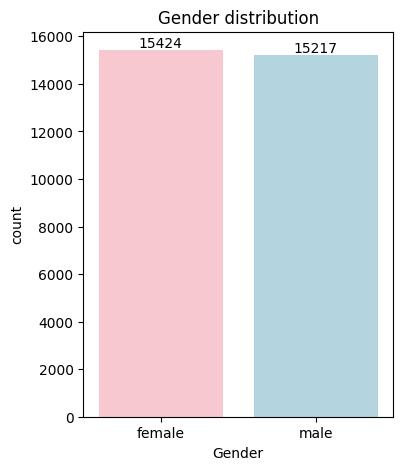

In [22]:
plt.figure(figsize = (4,5))
ax = sns.countplot(data=df, x="Gender", hue="Gender", palette={"female": "pink", "male": "lightblue"}, legend=False)
ax.bar_label(ax.containers[0]) #15424
ax.bar_label(ax.containers[1]) #15217
plt.title("Gender distribution")
plt.show()

In [23]:
#The dataset contains more females than males

In [24]:
# Remove the specified columns
df = df.drop(columns=['Total Gender', 'Total Females', 'Total Males'], errors='ignore')


In [25]:
gb = df.groupby("ParentEduc").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'})  
# Groups the data by parental education level and calculates the average scores for math, reading, and writing
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


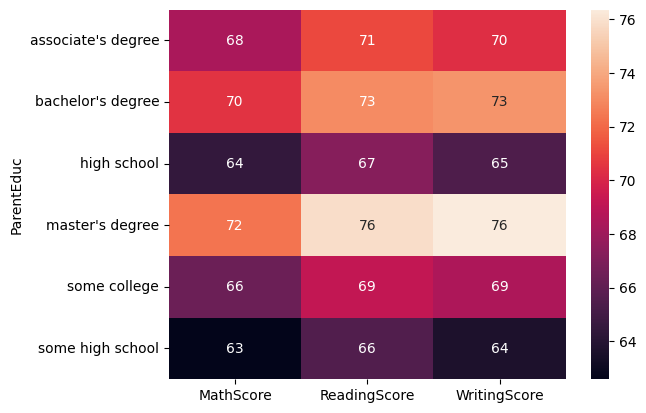

In [26]:
sns.heatmap(gb , annot = True)  # Creates a heatmap to visually compare average scores across parental education levels
plt.show()   


In [27]:
# From the heatmap above,
# we can conclude that the parents' education level has a positive impact on their children's scores in math, reading, and writing.

In [28]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'})  
# Groups the data by parental Marital Statut and calculates the average scores for math, reading, and writing
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


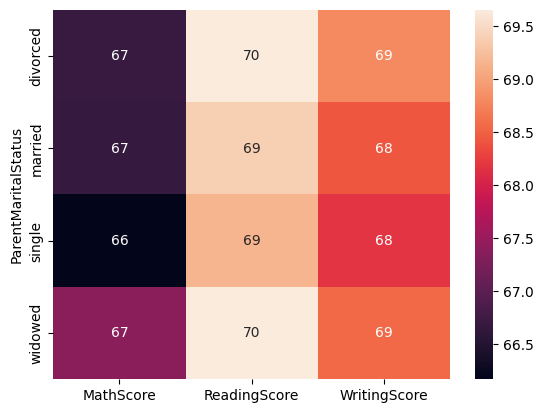

In [29]:
sns.heatmap(gb1 , annot = True)  # Creates a heatmap to visually compare average scores across parental education levels
plt.show()   


In [30]:
# From the heatmap above,
# we can conclude that the parentsparental Marital Statut has a no|nigligible impact on their children's scores in math, reading, and writing.

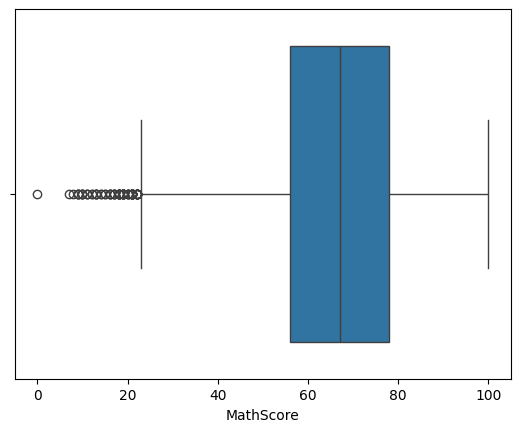

In [31]:
sns.boxplot(data=df, x="MathScore")  # Creates a boxplot to visualize the distribution and spread of Math scores, including median and outliers
plt.show()                          

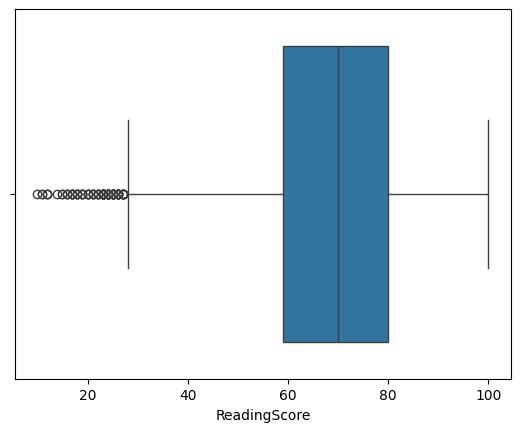

In [32]:
sns.boxplot(data=df, x="ReadingScore")  # Creates a boxplot to visualize the distribution and spread of Reading scores, including median and outliers
plt.show()                          

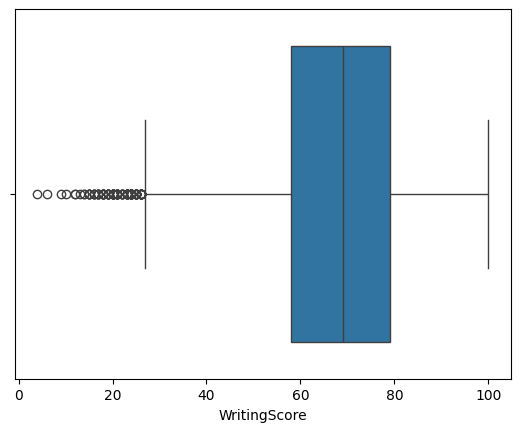

In [33]:
sns.boxplot(data=df, x="WritingScore")  # Creates a boxplot to visualize the distribution and spread of Writing scores, including median and outliers
plt.show()                          

Distrubition of Ethnic Groups 

In [34]:
print(df ["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


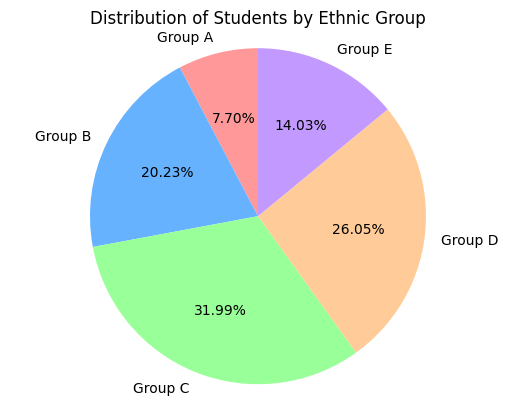

In [35]:
# Count the number of students in each ethnic group
groupA = df.loc[df['EthnicGroup'] == "group A"].count()
groupB = df.loc[df['EthnicGroup'] == "group B"].count()
groupC = df.loc[df['EthnicGroup'] == "group C"].count()
groupD = df.loc[df['EthnicGroup'] == "group D"].count()
groupE = df.loc[df['EthnicGroup'] == "group E"].count()

# Extract the counts for the pie chart
mlist = [
    groupA["EthnicGroup"],
    groupB["EthnicGroup"],
    groupC["EthnicGroup"],
    groupD["EthnicGroup"],
    groupE["EthnicGroup"]
]

# Define the labels for each group
l = ["Group A", "Group B", "Group C", "Group D", "Group E"]
# Define custom colors
colors = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99", "#C299FF"]  # pink, light blue, light green, peach, lavender

# Plot the pie chart with custom colors
plt.pie(mlist, labels=l, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title("Distribution of Students by Ethnic Group")
plt.axis('equal')  # Keeps the pie chart circular
plt.show()



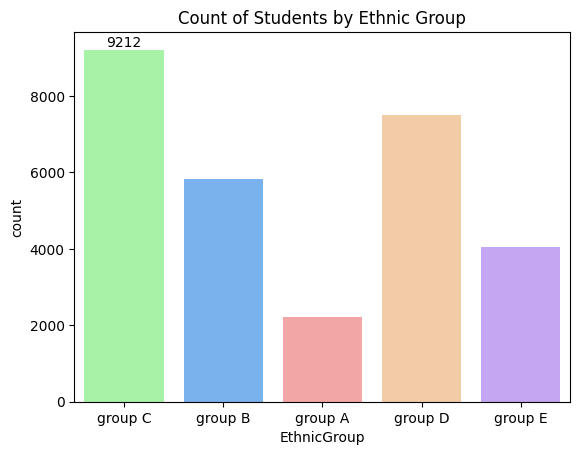

In [36]:
# Define custom colors
colors = ["#99FF99", "#66B2FF","#FF9999" , "#FFCC99", "#C299FF"]

# Use hue to assign the same variable as x, and disable the duplicate legend
ax = sns.countplot(data=df, x='EthnicGroup', hue='EthnicGroup', palette=colors, legend=False)

# Add count labels above bars
ax.bar_label(ax.containers[0])

# Add title
plt.title("Count of Students by Ethnic Group")
plt.show()


In [37]:
df["AvgMathScore"] = df["MathScore"]
df["AvgReadingScore"] = df["ReadingScore"]
df["AvgWritingScore"] = df["WritingScore"]

In [39]:
df.to_csv("Expanded_data_with_more_features.csv", index=False)